# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
data = pd.read_csv('spam.csv')

# Explore Data

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
data.shape

(5572, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.duplicated().sum()

415

In [8]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
data["Category"].unique().sum()

'hamspam'

# Cleaning Data

In [10]:
data = data.drop_duplicates()


In [11]:
data.duplicated().sum()

0

In [12]:
data['Category'].replace({'ham':1,'spam':0},inplace=True)

<Axes: ylabel='count'>

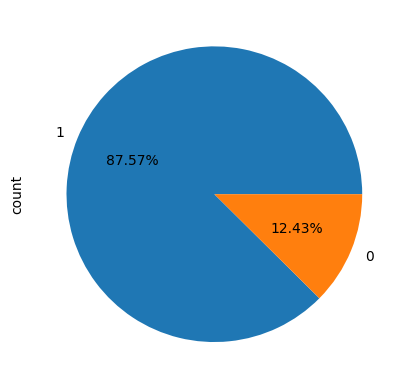

In [13]:
data.Category.value_counts().plot.pie(autopct ='%.2f%%')

In [14]:
data['num_char']=data['Message'].apply(len)

In [15]:
data

,Category,Message,num_char
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,160
5568,1,Will ü b going to esplanade fr home?,36
5569,1,"Pity, * was in mood for that. So...any other s...",57
5570,1,The guy did some bitching but I acted like i'd...,125


In [16]:
from nltk.tokenize import word_tokenize
data['Word_Num'] = data['Message'].apply(lambda x: len(word_tokenize(x)))

In [17]:
data

,Category,Message,num_char,Word_Num
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,160,35
5568,1,Will ü b going to esplanade fr home?,36,9
5569,1,"Pity, * was in mood for that. So...any other s...",57,15
5570,1,The guy did some bitching but I acted like i'd...,125,27


In [18]:
from nltk.tokenize import sent_tokenize
data['sent_num'] = data['Message'].apply(lambda x: len(sent_tokenize(x)))

In [19]:
data

,Category,Message,num_char,Word_Num,sent_num
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,1,Will ü b going to esplanade fr home?,36,9,1
5569,1,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,1,The guy did some bitching but I acted like i'd...,125,27,1


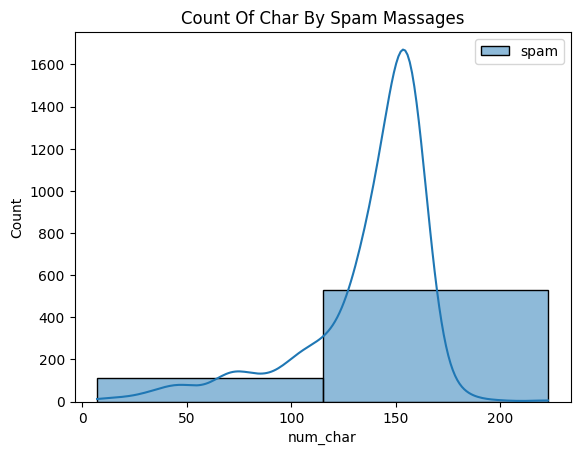

In [20]:
sns.histplot(data[data['Category']==0]['num_char'],binwidth=100,kde=True,label='spam')
plt.legend()
plt.title('Count Of Char By Spam Massages')
plt.show()

In [21]:
df=data[['Category','num_char','Word_Num','sent_num']]

In [22]:
cor=df.corr()

<Axes: >

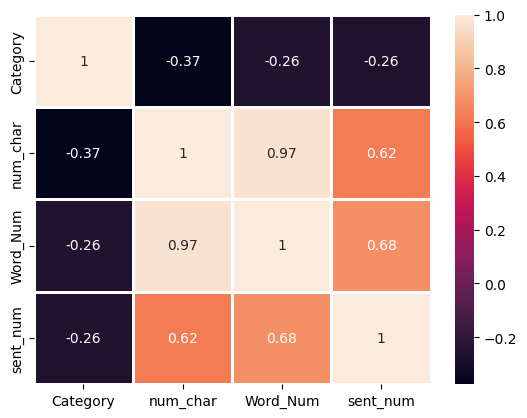

In [23]:
sns.heatmap(cor,annot=True,linewidth=1)

# Data Processing

In [24]:
import string
punc = string.punctuation

from nltk.corpus import stopwords
stop = stopwords.words("english")

from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()

In [25]:
def Process(text):
    text = text.lower()
    token = nltk.word_tokenize(text)
    process_tokens = []
    for word in token:
        if word not in punc and word not in stop:
            process_tokens.append(word)
    
    stemmed_tokens = []
    for word in process_tokens:
        stemmed_tokens.append(ps.lemmatize(word, pos="v"))
    
    return " ".join(stemmed_tokens)

In [26]:
data['New_Message']=data['Message'].apply(Process)

In [27]:
data

,Category,Message,num_char,Word_Num,sent_num,New_Message
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think go usf live around though
...,...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time try 2 contact u. u £750 pound prize 2...
5568,1,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanade fr home
5569,1,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood ... suggestions
5570,1,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like 'd interest buy something e...


In [28]:
data['num_char2']=data['New_Message'].apply(len)

In [145]:
data

,Category,Message,num_char,Word_Num,sent_num,New_Message,num_char2
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...,93
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...,141
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...,43
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think go usf live around though,39
...,...,...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time try 2 contact u. u £750 pound prize 2...,112
5568,1,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanade fr home,24
5569,1,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood ... suggestions,25
5570,1,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like 'd interest buy something e...,72


# Data Modeling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [31]:
cv=CountVectorizer
tf=TfidfVectorizer

In [32]:
data = data[data['New_Message'].str.strip() != ''].copy()


# Apply CountVectorizer
cv = CountVectorizer(max_features=3000)
x = cv.fit_transform(data['New_Message']).toarray()

In [33]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
y=data.Category.values

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [36]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , precision_score , f1_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# naive_bayes

In [37]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [38]:
model_names=['GaussianNB','MultinomialNB','BernoulliNB']
score=[]
preci=[]
f1=[]

In [39]:
def model(mo):
    mo.fit(x_train,y_train)
    pred=mo.predict(x_test)
    score.append(accuracy_score(pred,y_test))
    preci.append(precision_score(pred,y_test))
    f1.append(precision_score(pred,y_test))
    print(confusion_matrix(pred,y_test))

In [40]:
model(gnb)

[[103 133]
 [ 14 781]]


In [41]:
model(mnb)

[[104  11]
 [ 13 903]]


In [42]:
model(bnb)

[[101   1]
 [ 16 913]]


In [43]:
ndf=pd.DataFrame({'Models_name':model_names,'Accuracy':score,'Precision':preci,'f1':f1})

In [44]:
ndf

,Models_name,Accuracy,Precision,f1
0,GaussianNB,0.857420,0.854486,0.854486
1,MultinomialNB,0.976722,0.987965,0.987965
2,BernoulliNB,0.983511,0.998906,0.998906


<Axes: xlabel='Models_name'>

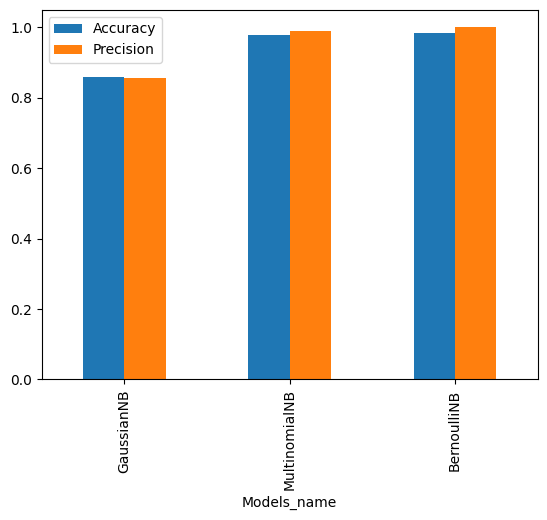

In [45]:
ndf.plot(x='Models_name',y=['Accuracy','Precision'],kind='bar')

# Logistic Regression

In [46]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
lg_pred = lg.predict(x_test)
lg_accuracy = accuracy_score(y_test, lg_pred)
lg_precision = precision_score(y_test, lg_pred)
lg_f1 = f1_score(y_test, lg_pred)

print(f"Accuracy Score:    {lg_accuracy:.4f}\n\
Precision Score:   {lg_precision:.4f}\n\
F1 Score:          {lg_f1:.4f}")

Accuracy Score:    0.9777
Precision Score:   0.9755
F1 Score:          0.9876


# Random Forest Classifier

In [48]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [49]:
rf_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(f"Accuracy Score:    {rf_accuracy:.4f}\n\
Precision Score:   {rf_precision:.4f}\n\
F1 Score:          {rf_f1:.4f}")

Accuracy Score:    0.9758
Precision Score:   0.9754
F1 Score:          0.9865


# XGBoost

In [50]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [51]:
xgb_pred = xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

print(f"Accuracy Score:    {xgb_accuracy:.4f}\n\
Precision Score:   {xgb_precision:.4f}\n\
F1 Score:          {xgb_f1:.4f}")

Accuracy Score:    0.9748
Precision Score:   0.9733
F1 Score:          0.9860


# Comparing the Models

In [52]:
all_models_data = {
    'Model': ['GaussianNB', 'MultinomialNB', 'BernoulliNB', 'LogisticRegression', 'RandomForest', 'XGBoost'],
    'Accuracy': [score[0], score[1], score[2], lg_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [preci[0], preci[1], preci[2], lg_precision, rf_precision, xgb_precision],
    'F1_Score': [f1[0], f1[1], f1[2], lg_f1, rf_f1, xgb_f1]
}

In [53]:
comparison_df = pd.DataFrame(all_models_data)
print("\n" + "="*50)
print("COMPLETE MODEL COMPARISON:")
print("="*50)
print(comparison_df.round(4))


COMPLETE MODEL COMPARISON:
                Model  Accuracy  Precision  F1_Score
0          GaussianNB    0.8574     0.8545    0.8545
1       MultinomialNB    0.9767     0.9880    0.9880
2         BernoulliNB    0.9835     0.9989    0.9989
3  LogisticRegression    0.9777     0.9755    0.9876
4        RandomForest    0.9758     0.9754    0.9865
5             XGBoost    0.9748     0.9733    0.9860


In [54]:
best_accuracy_idx = comparison_df['Accuracy'].idxmax()
best_f1_idx = comparison_df['F1_Score'].idxmax()
best_precision_idx = comparison_df['Precision'].idxmax()

In [55]:
print(f"\nBest Accuracy: {comparison_df.loc[best_accuracy_idx, 'Model']} ({comparison_df.loc[best_accuracy_idx, 'Accuracy']:.4f})")
print(f"Best Precision: {comparison_df.loc[best_precision_idx, 'Model']} ({comparison_df.loc[best_precision_idx, 'Precision']:.4f})")
print(f"Best F1 Score: {comparison_df.loc[best_f1_idx, 'Model']} ({comparison_df.loc[best_f1_idx, 'F1_Score']:.4f})")


Best Accuracy: BernoulliNB (0.9835)
Best Precision: BernoulliNB (0.9989)
Best F1 Score: BernoulliNB (0.9989)


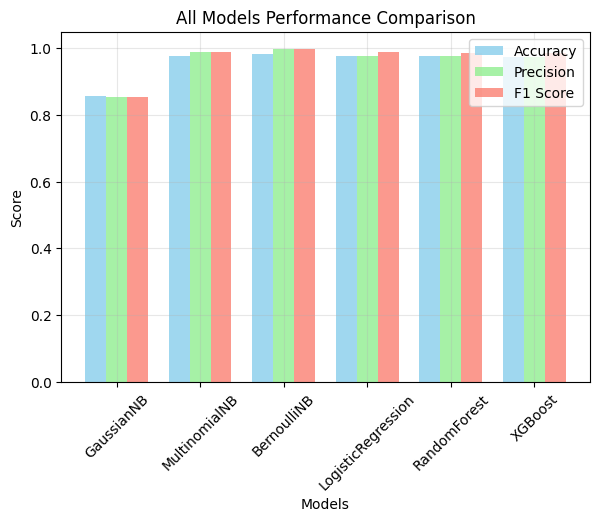

In [56]:
plt.figure(figsize=(15, 10))

# 1. Bar plot comparing all metrics
plt.subplot(2, 2, 1)
x_pos = range(len(comparison_df))
width = 0.25

plt.bar([p - width for p in x_pos], comparison_df['Accuracy'], width, label='Accuracy', alpha=0.8, color='skyblue')
plt.bar(x_pos, comparison_df['Precision'], width, label='Precision', alpha=0.8, color='lightgreen')
plt.bar([p + width for p in x_pos], comparison_df['F1_Score'], width, label='F1 Score', alpha=0.8, color='salmon')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('All Models Performance Comparison')
plt.xticks(x_pos, comparison_df['Model'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

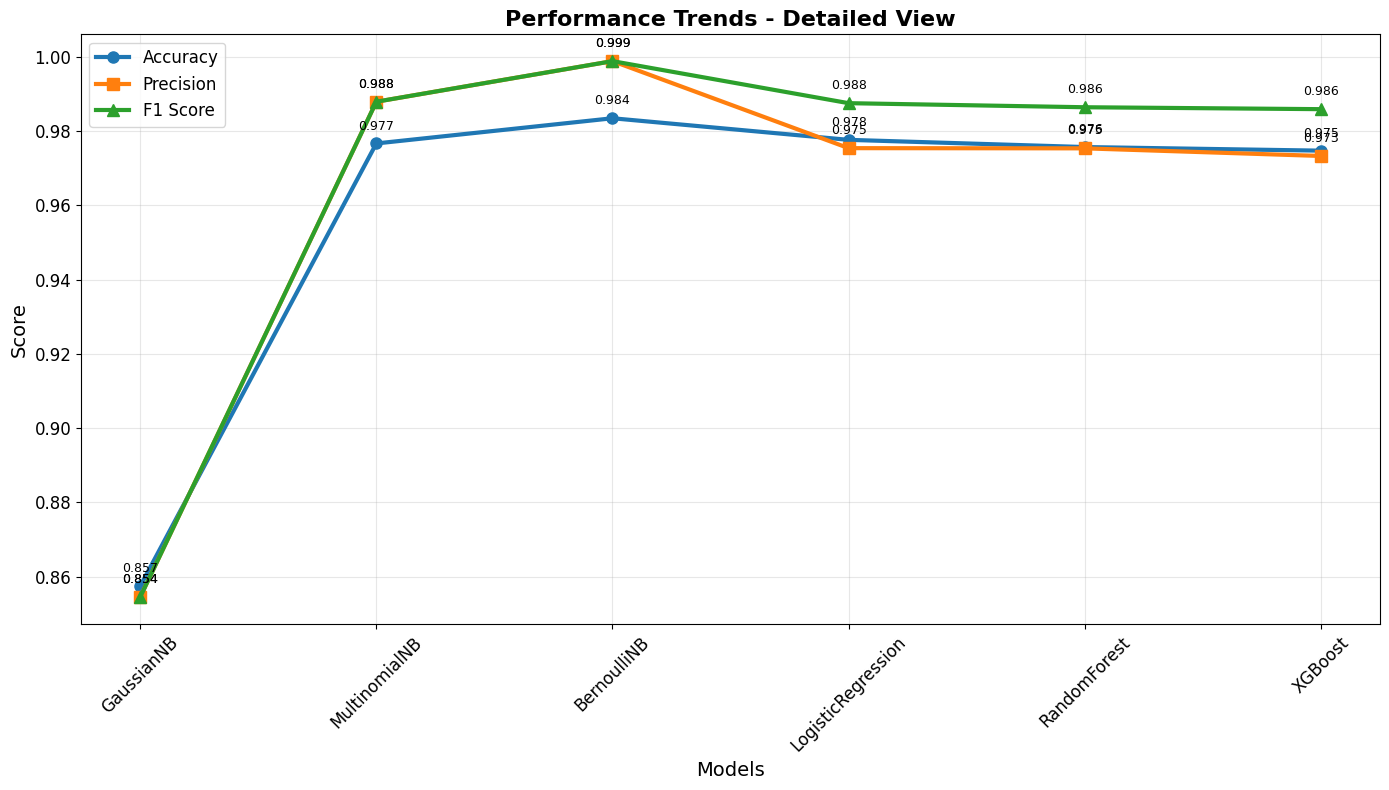

In [57]:
# Create a bigger separate line plot
plt.figure(figsize=(14, 8))
plt.plot(comparison_df['Model'], comparison_df['Accuracy'], marker='o', label='Accuracy', linewidth=3, markersize=8)
plt.plot(comparison_df['Model'], comparison_df['Precision'], marker='s', label='Precision', linewidth=3, markersize=8)
plt.plot(comparison_df['Model'], comparison_df['F1_Score'], marker='^', label='F1 Score', linewidth=3, markersize=8)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Performance Trends - Detailed View', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on points
for i, model in enumerate(comparison_df['Model']):
    plt.annotate(f"{comparison_df['Accuracy'].iloc[i]:.3f}", 
                (i, comparison_df['Accuracy'].iloc[i]), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    plt.annotate(f"{comparison_df['Precision'].iloc[i]:.3f}", 
                (i, comparison_df['Precision'].iloc[i]), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    plt.annotate(f"{comparison_df['F1_Score'].iloc[i]:.3f}", 
                (i, comparison_df['F1_Score'].iloc[i]), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [58]:
# Create ranking table
print("\n" + "="*60)
print("MODEL RANKINGS:")
print("="*60)

print("\nBy Accuracy (Highest to Lowest):")
accuracy_sorted = comparison_df.sort_values('Accuracy', ascending=False)
for i, (_, row) in enumerate(accuracy_sorted.iterrows(), 1):
    print(f"{i}. {row['Model']:<18} : {row['Accuracy']:.4f}")

print("\nBy F1 Score (Highest to Lowest):")
f1_sorted = comparison_df.sort_values('F1_Score', ascending=False)
for i, (_, row) in enumerate(f1_sorted.iterrows(), 1):
    print(f"{i}. {row['Model']:<18} : {row['F1_Score']:.4f}")

print("\nBy Precision (Highest to Lowest):")
precision_sorted = comparison_df.sort_values('Precision', ascending=False)
for i, (_, row) in enumerate(precision_sorted.iterrows(), 1):
    print(f"{i}. {row['Model']:<18} : {row['Precision']:.4f}")


MODEL RANKINGS:

By Accuracy (Highest to Lowest):
1. BernoulliNB        : 0.9835
2. LogisticRegression : 0.9777
3. MultinomialNB      : 0.9767
4. RandomForest       : 0.9758
5. XGBoost            : 0.9748
6. GaussianNB         : 0.8574

By F1 Score (Highest to Lowest):
1. BernoulliNB        : 0.9989
2. MultinomialNB      : 0.9880
3. LogisticRegression : 0.9876
4. RandomForest       : 0.9865
5. XGBoost            : 0.9860
6. GaussianNB         : 0.8545

By Precision (Highest to Lowest):
1. BernoulliNB        : 0.9989
2. MultinomialNB      : 0.9880
3. LogisticRegression : 0.9755
4. RandomForest       : 0.9754
5. XGBoost            : 0.9733
6. GaussianNB         : 0.8545


# overfitting detection

In [59]:
print("="*60)
print("OVERFITTING ANALYSIS:")
print("="*60)

# Store training and test results
overfitting_results = {
    'Model': [],
    'Train_Accuracy': [],
    'Test_Accuracy': [],
    'Accuracy_Difference': [],
    'Overfitting_Status': []
}

# Re-evaluate models on training data
models_dict = {
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB': bnb,
    'LogisticRegression': lg,
    'RandomForest': rf,
    'XGBoost': xgb
}

test_accuracies = [score[0], score[1], score[2], lg_accuracy, rf_accuracy, xgb_accuracy]

for i, (name, model) in enumerate(models_dict.items()):
    # Calculate training accuracy
    train_pred = model.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    # Get test accuracy
    test_accuracy = test_accuracies[i]
    
    # Calculate difference
    accuracy_diff = train_accuracy - test_accuracy
    
    # Determine overfitting status
    if accuracy_diff > 0.1:  # More than 10% difference
        status = "High Overfitting"
    elif accuracy_diff > 0.05:  # 5-10% difference
        status = "Moderate Overfitting"
    elif accuracy_diff > 0.02:  # 2-5% difference
        status = "Slight Overfitting"
    else:
        status = "Good Generalization"
    
    # Store results
    overfitting_results['Model'].append(name)
    overfitting_results['Train_Accuracy'].append(train_accuracy)
    overfitting_results['Test_Accuracy'].append(test_accuracy)
    overfitting_results['Accuracy_Difference'].append(accuracy_diff)
    overfitting_results['Overfitting_Status'].append(status)
    
    print(f"\n{name}:")
    print(f"  Training Accuracy:  {train_accuracy:.4f}")
    print(f"  Test Accuracy:      {test_accuracy:.4f}")
    print(f"  Difference:         {accuracy_diff:.4f}")
    print(f"  Status:             {status}")

# Create overfitting DataFrame
overfitting_df = pd.DataFrame(overfitting_results)
print(f"\n{'='*60}")
print("OVERFITTING SUMMARY TABLE:")
print("="*60)
print(overfitting_df.round(4))

OVERFITTING ANALYSIS:

GaussianNB:
  Training Accuracy:  0.8886
  Test Accuracy:      0.8574
  Difference:         0.0312
  Status:             Slight Overfitting

MultinomialNB:
  Training Accuracy:  0.9920
  Test Accuracy:      0.9767
  Difference:         0.0153
  Status:             Good Generalization

BernoulliNB:
  Training Accuracy:  0.9874
  Test Accuracy:      0.9835
  Difference:         0.0039
  Status:             Good Generalization

LogisticRegression:
  Training Accuracy:  0.9949
  Test Accuracy:      0.9777
  Difference:         0.0172
  Status:             Good Generalization

RandomForest:
  Training Accuracy:  0.9998
  Test Accuracy:      0.9758
  Difference:         0.0240
  Status:             Slight Overfitting

XGBoost:
  Training Accuracy:  0.9903
  Test Accuracy:      0.9748
  Difference:         0.0155
  Status:             Good Generalization

OVERFITTING SUMMARY TABLE:
                Model  Train_Accuracy  Test_Accuracy  Accuracy_Difference  \
0          G

In [60]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("="*60)
print("CROSS-VALIDATION ANALYSIS (5-Fold):")
print("="*60)

cv_results = {
    'Model': [],
    'CV_Mean': [],
    'CV_Std': [],
    'Test_Accuracy': [],
    'CV_vs_Test_Diff': []
}

for name, model in models_dict.items():
    
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    
    test_acc = overfitting_df[overfitting_df['Model'] == name]['Test_Accuracy'].iloc[0]
    
    
    cv_test_diff = cv_mean - test_acc
    
    cv_results['Model'].append(name)
    cv_results['CV_Mean'].append(cv_mean)
    cv_results['CV_Std'].append(cv_std)
    cv_results['Test_Accuracy'].append(test_acc)
    cv_results['CV_vs_Test_Diff'].append(cv_test_diff)
    
    print(f"\n{name}:")
    print(f"  CV Mean ± Std:      {cv_mean:.4f} ± {cv_std:.4f}")
    print(f"  Test Accuracy:      {test_acc:.4f}")
    print(f"  CV vs Test Diff:    {cv_test_diff:.4f}")

cv_df = pd.DataFrame(cv_results)
print(f"\n{'='*60}")
print("CROSS-VALIDATION SUMMARY TABLE:")
print("="*60)
print(cv_df.round(4))

CROSS-VALIDATION ANALYSIS (5-Fold):

GaussianNB:
  CV Mean ± Std:      0.8741 ± 0.0087
  Test Accuracy:      0.8574
  CV vs Test Diff:    0.0166

MultinomialNB:
  CV Mean ± Std:      0.9854 ± 0.0023
  Test Accuracy:      0.9767
  CV vs Test Diff:    0.0087

BernoulliNB:
  CV Mean ± Std:      0.9820 ± 0.0046
  Test Accuracy:      0.9835
  CV vs Test Diff:    -0.0015

LogisticRegression:
  CV Mean ± Std:      0.9789 ± 0.0038
  Test Accuracy:      0.9777
  CV vs Test Diff:    0.0012

RandomForest:
  CV Mean ± Std:      0.9769 ± 0.0033
  Test Accuracy:      0.9758
  CV vs Test Diff:    0.0012

XGBoost:
  CV Mean ± Std:      0.9774 ± 0.0061
  Test Accuracy:      0.9748
  CV vs Test Diff:    0.0027

CROSS-VALIDATION SUMMARY TABLE:
                Model  CV_Mean  CV_Std  Test_Accuracy  CV_vs_Test_Diff
0          GaussianNB   0.8741  0.0087         0.8574           0.0166
1       MultinomialNB   0.9854  0.0023         0.9767           0.0087
2         BernoulliNB   0.9820  0.0046         0.983

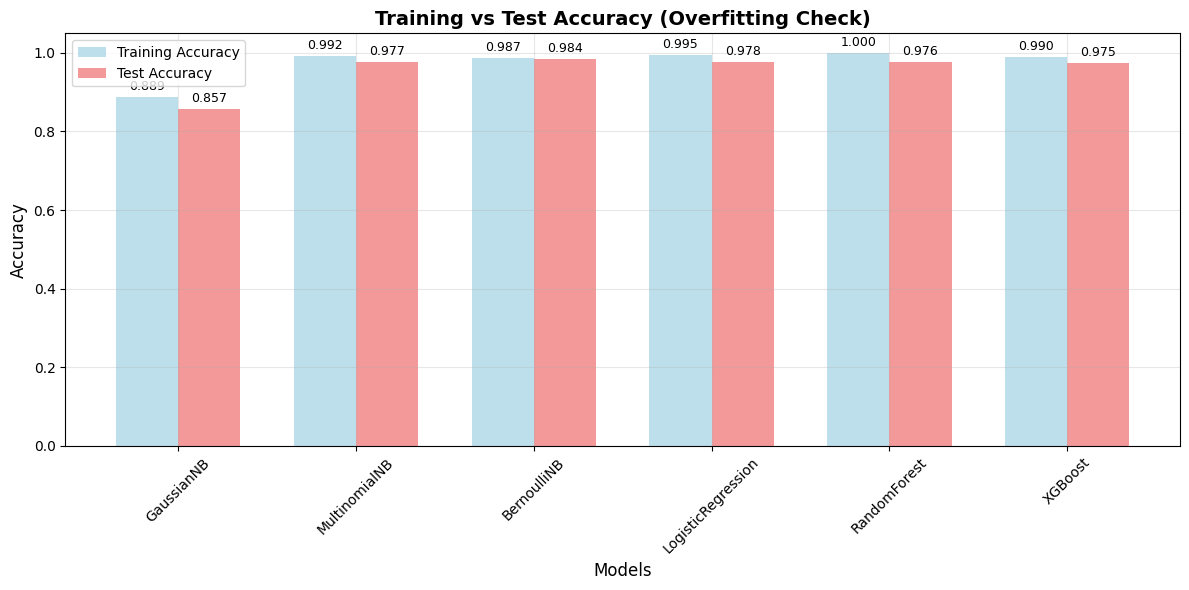

In [61]:
plt.figure(figsize=(12, 6))

# Training vs Test Accuracy
x_pos = range(len(overfitting_df))
width = 0.35

plt.bar([p - width/2 for p in x_pos], overfitting_df['Train_Accuracy'], 
        width, label='Training Accuracy', alpha=0.8, color='lightblue')
plt.bar([p + width/2 for p in x_pos], overfitting_df['Test_Accuracy'], 
        width, label='Test Accuracy', alpha=0.8, color='lightcoral')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Test Accuracy (Overfitting Check)', fontsize=14, fontweight='bold')
plt.xticks(x_pos, overfitting_df['Model'], rotation=45)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add value labels
for i, (train_acc, test_acc) in enumerate(zip(overfitting_df['Train_Accuracy'], overfitting_df['Test_Accuracy'])):
    plt.text(i - width/2, train_acc + 0.01, f'{train_acc:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



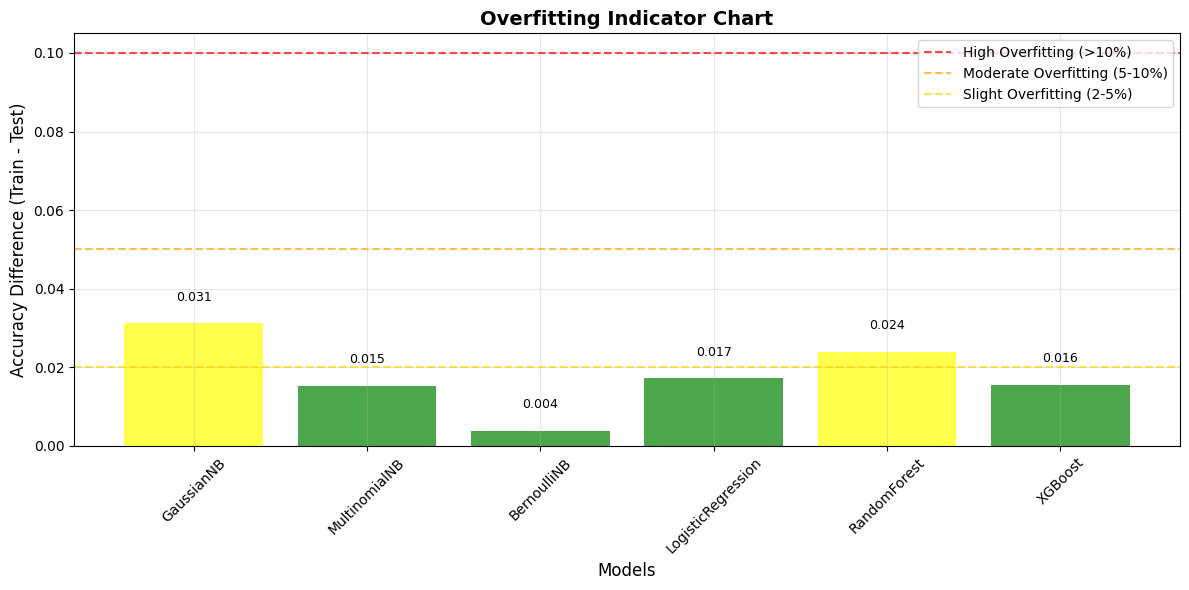

In [62]:

plt.figure(figsize=(12, 6))

# Color code based on overfitting level
colors = ['red' if diff > 0.1 else 'orange' if diff > 0.05 else 'yellow' if diff > 0.02 else 'green' 
          for diff in overfitting_df['Accuracy_Difference']]

bars = plt.bar(overfitting_df['Model'], overfitting_df['Accuracy_Difference'], 
               color=colors, alpha=0.7)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Difference (Train - Test)', fontsize=12)
plt.title('Overfitting Indicator Chart', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add horizontal lines for overfitting thresholds
plt.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='High Overfitting (>10%)')
plt.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Moderate Overfitting (5-10%)')
plt.axhline(y=0.02, color='gold', linestyle='--', alpha=0.7, label='Slight Overfitting (2-5%)')

# Add value labels on bars
for i, v in enumerate(overfitting_df['Accuracy_Difference']):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

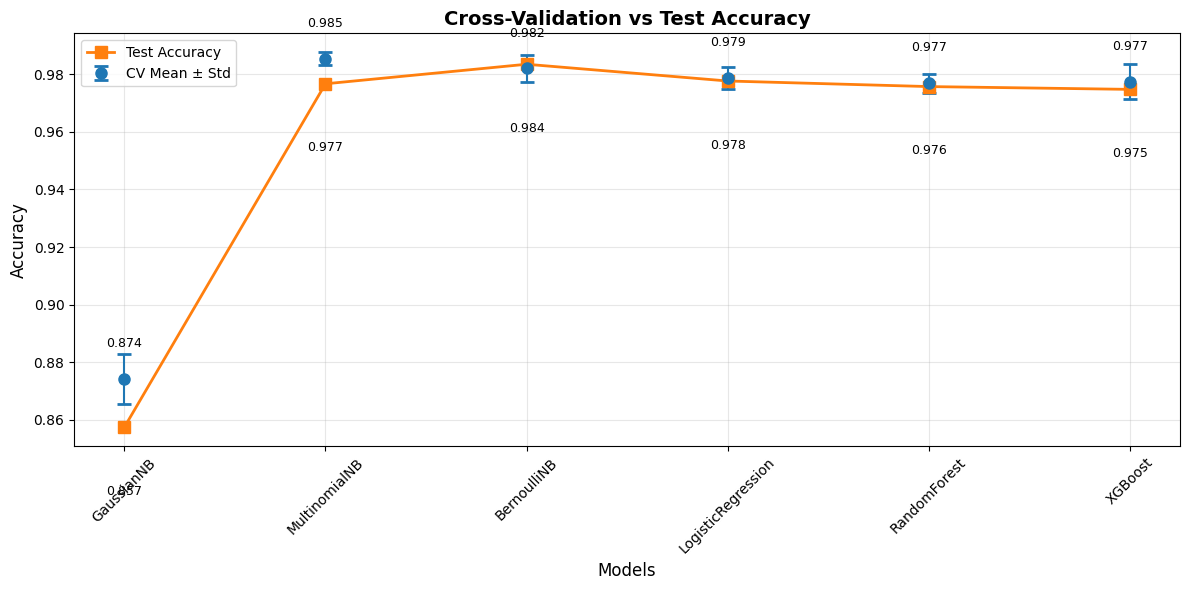

In [63]:
plt.figure(figsize=(12, 6))

# Cross-validation mean with error bars
plt.errorbar(range(len(cv_df)), cv_df['CV_Mean'], yerr=cv_df['CV_Std'], 
             fmt='o', capsize=5, capthick=2, label='CV Mean ± Std', markersize=8)
plt.plot(range(len(cv_df)), cv_df['Test_Accuracy'], 's-', 
         label='Test Accuracy', markersize=8, linewidth=2)

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-Validation vs Test Accuracy', fontsize=14, fontweight='bold')
plt.xticks(range(len(cv_df)), cv_df['Model'], rotation=45)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add value labels
for i, (cv_mean, test_acc) in enumerate(zip(cv_df['CV_Mean'], cv_df['Test_Accuracy'])):
    plt.text(i, cv_mean + 0.01, f'{cv_mean:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(i, test_acc - 0.02, f'{test_acc:.3f}', ha='center', va='top', fontsize=9)

plt.tight_layout()
plt.show()

In [131]:
print("="*80)
print("OVERFITTING DETECTION SUMMARY:")
print("="*80)

# Count models by overfitting status
status_counts = overfitting_df['Overfitting_Status'].value_counts()
print("\nOverfitting Status Distribution:")
for status, count in status_counts.items():
    print(f"  {status}: {count} model(s)")

# Find best generalizing models
best_generalizers = overfitting_df[overfitting_df['Overfitting_Status'] == 'Good Generalization']
if not best_generalizers.empty:
    print(f"\nBest Generalizing Models:")
    for _, row in best_generalizers.iterrows():
        print(f"  {row['Model']}: {row['Accuracy_Difference']:.4f} difference")
else:
    # Find models with least overfitting
    least_overfitting = overfitting_df.loc[overfitting_df['Accuracy_Difference'].idxmin()]
    print(f"\nLeast Overfitting Model:")
    print(f"  {least_overfitting['Model']}: {least_overfitting['Accuracy_Difference']:.4f} difference")

OVERFITTING DETECTION SUMMARY:

Overfitting Status Distribution:
  Good Generalization: 4 model(s)
  Slight Overfitting: 2 model(s)

Best Generalizing Models:
  MultinomialNB: 0.0153 difference
  BernoulliNB: 0.0039 difference
  LogisticRegression: 0.0172 difference
  XGBoost: 0.0155 difference


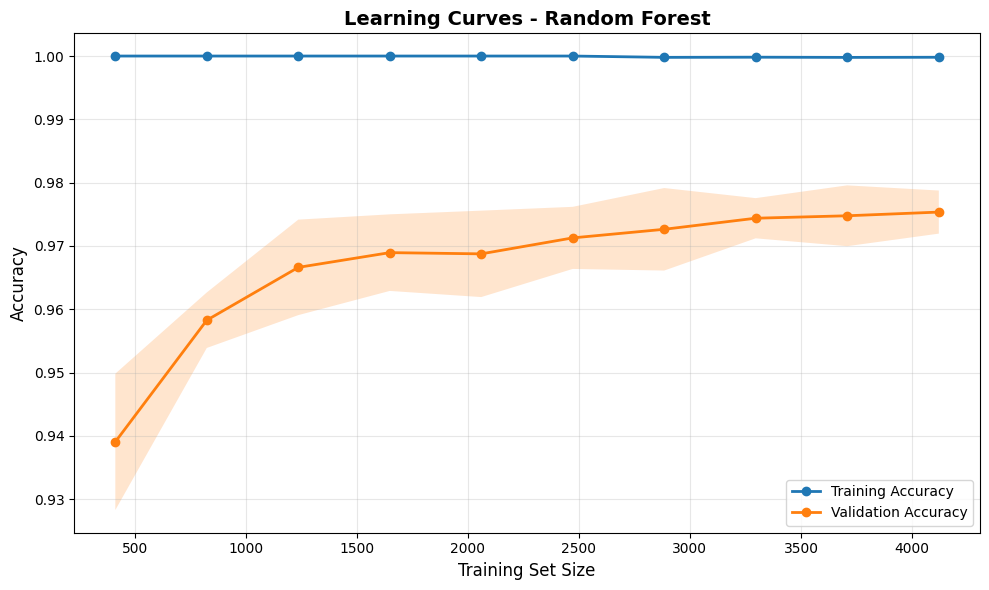

In [133]:
from sklearn.model_selection import learning_curve

plt.figure(figsize=(10, 6))

# Generate learning curve for Random Forest (as an example)
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(), x, y, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy', linewidth=2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Learning Curves - Random Forest', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
